# Decision Tree Classifier

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay

In [32]:
dt_data = pd.read_csv('Clustering_Data_Final.csv')
dt_data['Date'] = pd.to_datetime(dt_data['Date'])
dt_data['Month'] = dt_data['Date'].dt.month
dt_data.head()

,Division,Date,tmpc,pcpn,pdsi,sp01,sp09,sp24,cddc,hddc,PM2.5,OZONE,Month
0,1,2019-01-01,30.6,0.87,1.42,1.37,0.04,0.85,0.0,1066.0,4.410000,37.661290,1
1,1,2019-02-01,29.8,0.62,1.48,0.40,0.47,0.94,0.0,986.0,6.533333,38.428571,2
2,1,2019-03-01,37.3,1.57,1.94,1.13,1.11,1.09,0.0,859.0,6.712903,44.290323,3
3,1,2019-04-01,49.3,0.70,1.20,-0.79,0.37,0.50,0.0,471.0,3.613333,45.783333,4
4,1,2019-05-01,52.3,2.49,1.63,0.54,0.73,0.24,0.0,394.0,3.723333,47.870968,5


In [ ]:
features = ['Division','Month','tmpc','pcpn','pdsi','sp01','sp09','sp24','cddc','hddc']

X = dt_data[features]
y_pm25 = dt_data['PM2.5']
y_ozone = dt_data['OZONE']

X_train, X_test, y_pm25_train, y_pm25_test = train_test_split(X,y_pm25,test_size=0.25,random_state=1111)
_, _, y_ozone_train, y_ozone_test = train_test_split(X,y_ozone,test_size=0.25,random_state=1111)

dt_pm25 = DecisionTreeRegressor(random_state=1111)
dt_ozone = DecisionTreeRegressor(random_state=1111)

dt_pm25.fit(X_train,y_pm25_train)
dt_ozone.fit(X_train,y_ozone_train)

DecisionTreeRegressor(random_state=1111)

In [15]:
print("PM2.5 R²:", r2_score(y_pm25_test, dt_pm25.predict(X_test)))
print("OZONE R²:", r2_score(y_ozone_test, dt_ozone.predict(X_test)))

PM2.5 R²: -0.6439228383384799
OZONE R²: 0.5851938650876948


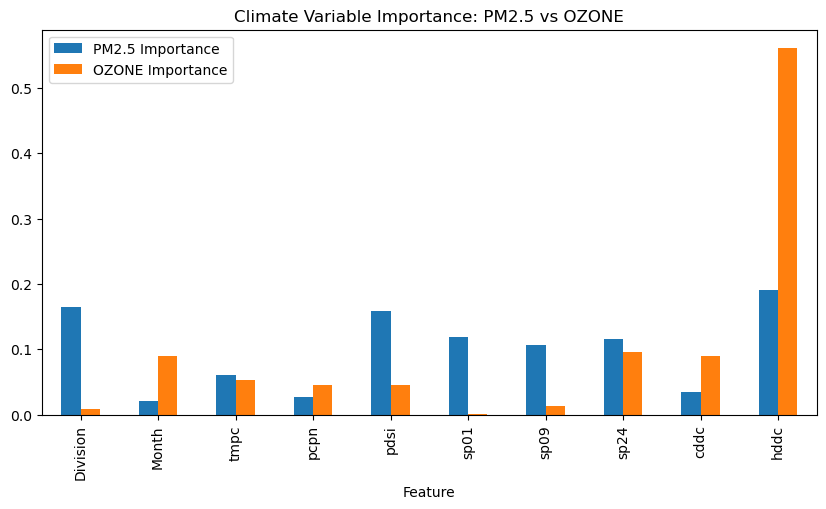

In [40]:
importances = pd.DataFrame({
    "Feature": features,
    "PM2.5 Importance": dt_pm25.feature_importances_,
    "OZONE Importance": dt_ozone.feature_importances_
}).set_index("Feature")

importances.plot(kind="bar", figsize=(10,5))
plt.title("Climate Variable Importance: PM2.5 vs OZONE")
plt.show()

In [61]:
importances = pd.DataFrame({
    "Feature": features,
    "Importance": dt_pm25.feature_importances_.round(3)
}).reset_index(drop=True)

importances = importances.sort_values('Importance',ascending=False).reset_index(drop=True)

importances.insert(0, 'Rank', range(1, len(importances) + 1))

importances.style.hide(axis='index')

Rank,Feature,Importance
1,hddc,0.190000
2,Division,0.165000
3,pdsi,0.159000
4,sp01,0.118000
5,sp24,0.116000
6,sp09,0.106000
7,tmpc,0.060000
8,cddc,0.034000
9,pcpn,0.028000
10,Month,0.022000


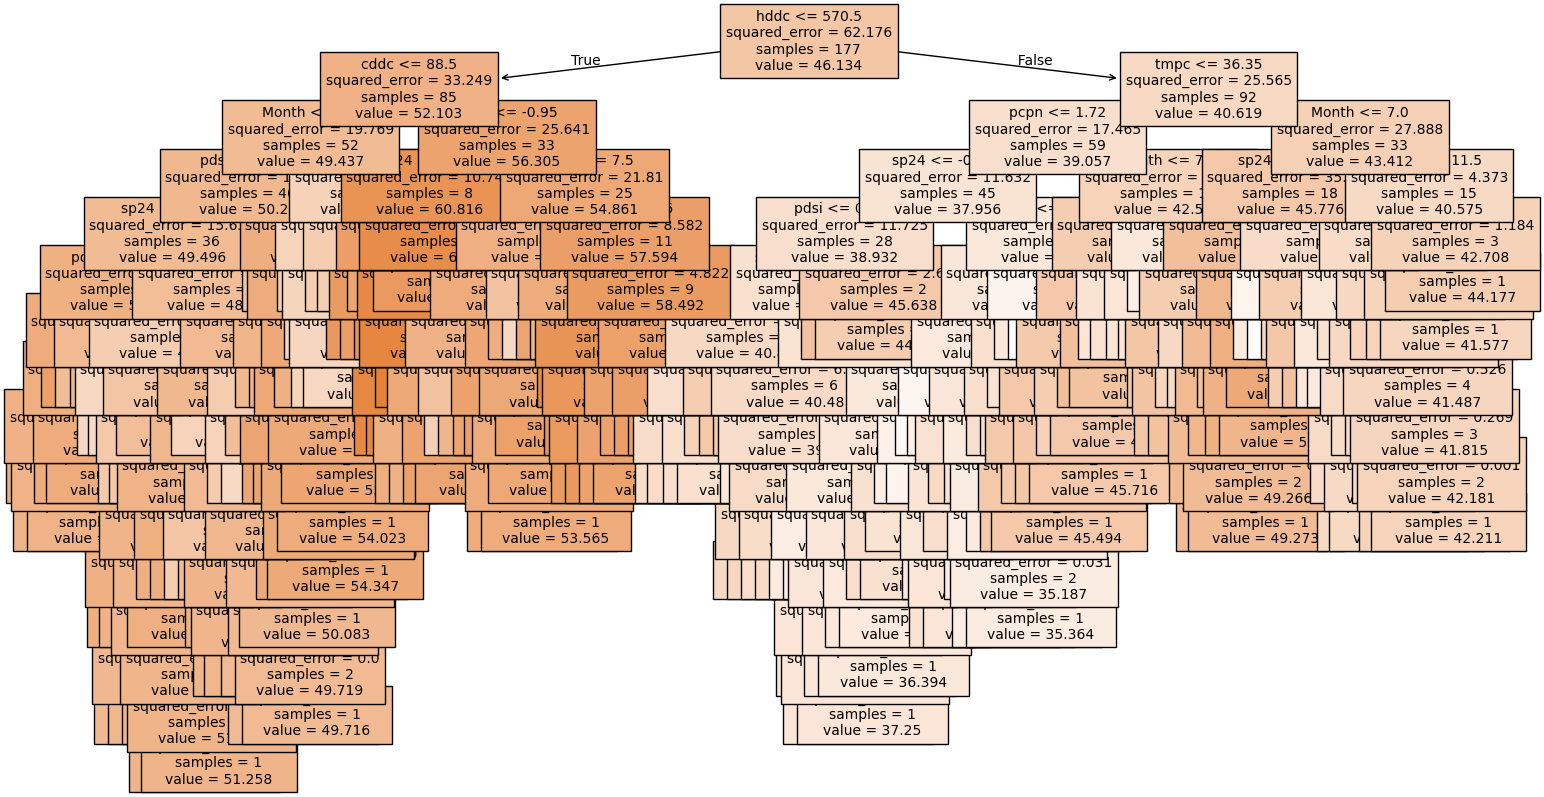

In [18]:
plt.figure(figsize=(18,10))
plot_tree(dt_ozone, feature_names=features, filled=True, fontsize=10)
plt.show()

In [59]:
importances = pd.DataFrame({
    "Feature": features,
    "Importance": dt_ozone.feature_importances_.round(3)
}).reset_index(drop=True)

importances = importances.sort_values('Importance',ascending=False).reset_index(drop=True)

importances.insert(0, 'Rank', range(1, len(importances) + 1))

importances.style.hide(axis='index')

Rank,Feature,Importance
1,hddc,0.561000
2,sp24,0.096000
3,Month,0.089000
4,cddc,0.089000
5,tmpc,0.053000
6,pcpn,0.045000
7,pdsi,0.045000
8,sp09,0.013000
9,Division,0.008000
10,sp01,0.001000


In [ ]:
rf_ozone = RandomForestRegressor(n_estimators=500, random_state=1111)

rf_ozone.fit(X_train, y_ozone_train)

print("RF OZONE R²:", r2_score(y_ozone_test, rf_ozone.predict(X_test)))

RF OZONE R²: 0.7631294195731911


In [31]:
rf_importances = pd.Series(rf_ozone.feature_importances_, index=features)
rf_importances.sort_values(ascending=False)


hddc        0.368093
tmpc        0.289583
Month       0.077815
sp24        0.071519
cddc        0.066235
pcpn        0.041926
sp09        0.025787
sp01        0.025734
pdsi        0.025635
Division    0.007673
dtype: float64

In [60]:
rf_importances = pd.DataFrame({
    "Feature": features,
    "Importance": rf_ozone.feature_importances_.round(3)
}).reset_index(drop=True)

rf_importances = rf_importances.sort_values('Importance',ascending=False).reset_index(drop=True)

rf_importances.insert(0, 'Rank', range(1, len(importances) + 1))

rf_importances.style.hide(axis='index')

Rank,Feature,Importance
1,hddc,0.368000
2,tmpc,0.290000
3,Month,0.078000
4,sp24,0.072000
5,cddc,0.066000
6,pcpn,0.042000
7,pdsi,0.026000
8,sp01,0.026000
9,sp09,0.026000
10,Division,0.008000
